In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.style.use('default')

In [59]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [60]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

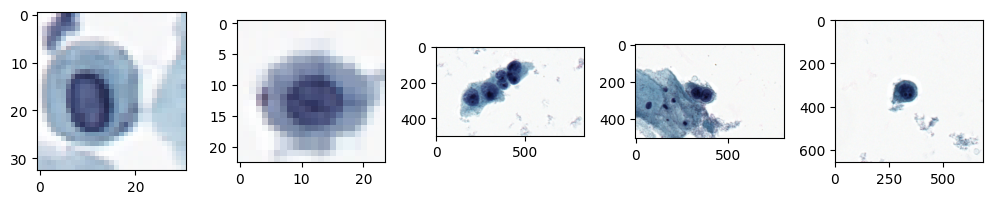

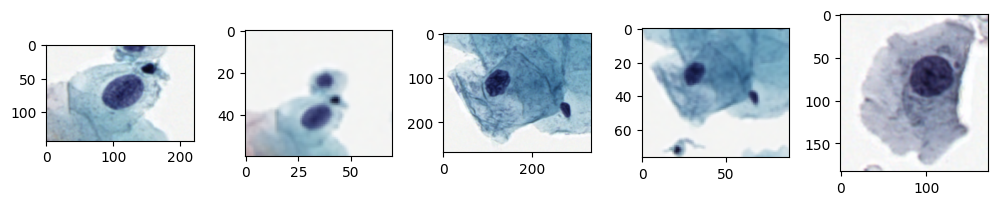

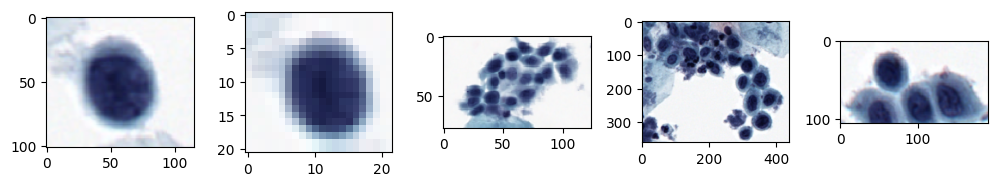

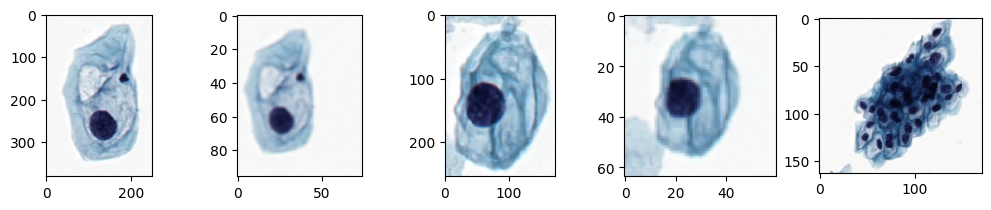

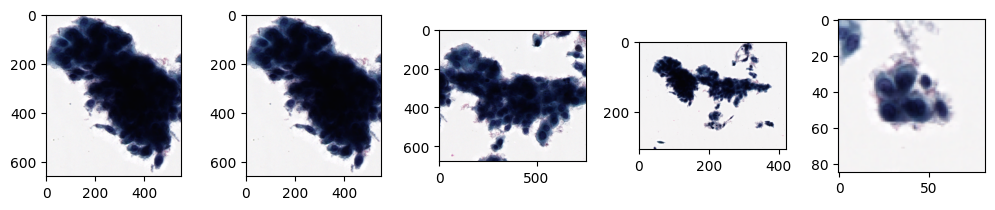

In [61]:
data_path = 'DataCNN/train/'

directories = ['ASC_H','ASC_US','HSIL','LSIL','SCC'] 

for j in directories:
    plot_imgs(data_path+j)

In [62]:
batch_size = 16
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  # zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
Categories=['ASC_H','ASC_US','HSIL','LSIL','SCC'] 
train_data_path = 'DataCNN/train/'
test_data_path = 'DataCNN/test/'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (56,56),
                                              batch_size = batch_size, 
                                              color_mode = 'rgba',
                                              class_mode = 'categorical',
                                             subset='training',
                                             shuffle="True")

valid_set = train_datagen.flow_from_directory(train_data_path, target_size = (56,56),
                                              batch_size = batch_size, 
                                              color_mode = 'rgba',
                                              class_mode = 'categorical',
                                             subset='validation',
                                             shuffle="True")

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (56,56),
                                              batch_size = batch_size, 
                                              color_mode = 'rgba',
                                              class_mode = 'categorical')

Found 13597 images belonging to 5 classes.
Found 1508 images belonging to 5 classes.
Found 712 images belonging to 5 classes.


In [64]:
classes = 5

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (56,56,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 56, 56, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 128)      

In [65]:
# import keras
# optimizer1 = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy',optimizer = "adam" , metrics = ['accuracy'])

In [66]:
model_path="saved_models/CNNProPosed.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [67]:
num_epochs = 30
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [68]:
history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=valid_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/30
849/849 [==============================] - ETA: 0s - loss: 1.5367 - accuracy: 0.2728
Epoch 1: val_accuracy improved from -inf to 0.31392, saving model to saved_models\CNNProPosed.h5
849/849 [==============================] - 55s 64ms/step - loss: 1.5367 - accuracy: 0.2728 - val_loss: 1.4753 - val_accuracy: 0.3139
Epoch 2/30
849/849 [==============================] - ETA: 0s - loss: 1.4430 - accuracy: 0.3478
Epoch 2: val_accuracy improved from 0.31392 to 0.38068, saving model to saved_models\CNNProPosed.h5
849/849 [==============================] - 53s 62ms/step - loss: 1.4430 - accuracy: 0.3478 - val_loss: 1.4341 - val_accuracy: 0.3807
Epoch 3/30
848/849 [============================>.] - ETA: 0s - loss: 1.3325 - accuracy: 0.3957
Epoch 3: val_accuracy improved from 0.38068 to 0.38352, saving model to saved_models\CNNProPosed.h5
849/849 [==============================] - 53s 63ms/step - loss: 1.3324 - accuracy: 0.3958 - val_loss: 1.3081 - val_accuracy: 0.3835
Epoch 4/30
848/8

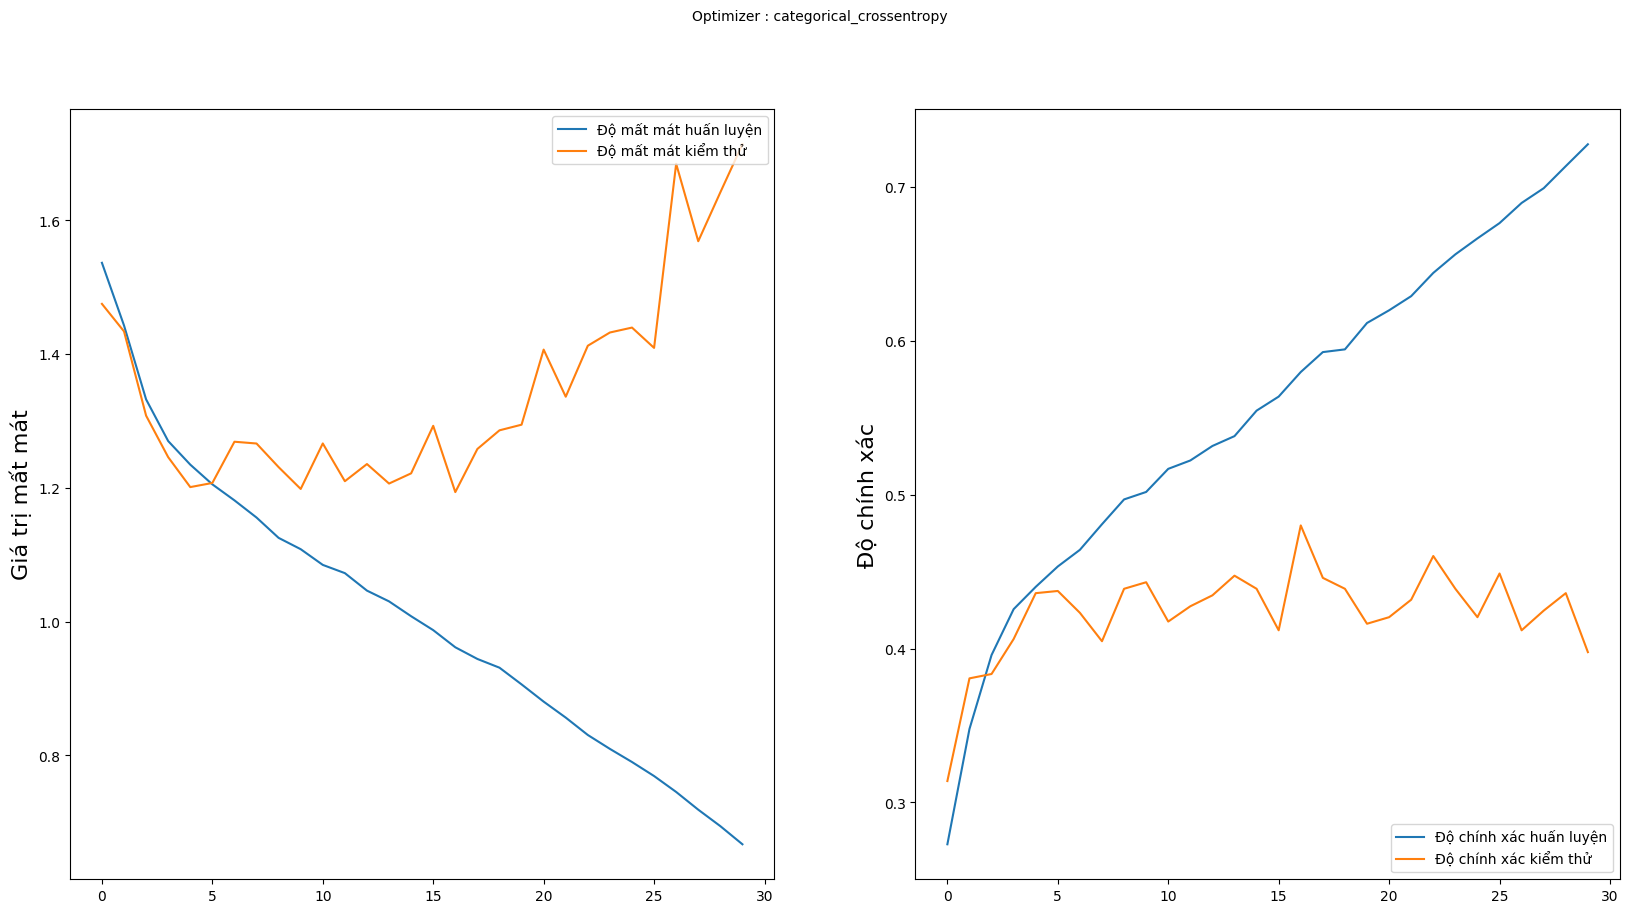

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : categorical_crossentropy', fontsize=10)
plt.ylabel('Giá trị mất mát', fontsize=16)
plt.plot(history.history['loss'], label='Độ mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Độ mất mát kiểm thử')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Độ chính xác', fontsize=16)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm thử')
plt.legend(loc='lower right')
plt.show()

45/45 [==============================] - 4s 75ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

       ASC_H       0.14      0.12      0.13       168
      ASC_US       0.18      0.22      0.19       152
        HSIL       0.16      0.20      0.18       128
        LSIL       0.18      0.15      0.16       136
         SCC       0.14      0.12      0.13       128

    accuracy                           0.16       712
   macro avg       0.16      0.16      0.16       712
weighted avg       0.16      0.16      0.16       712



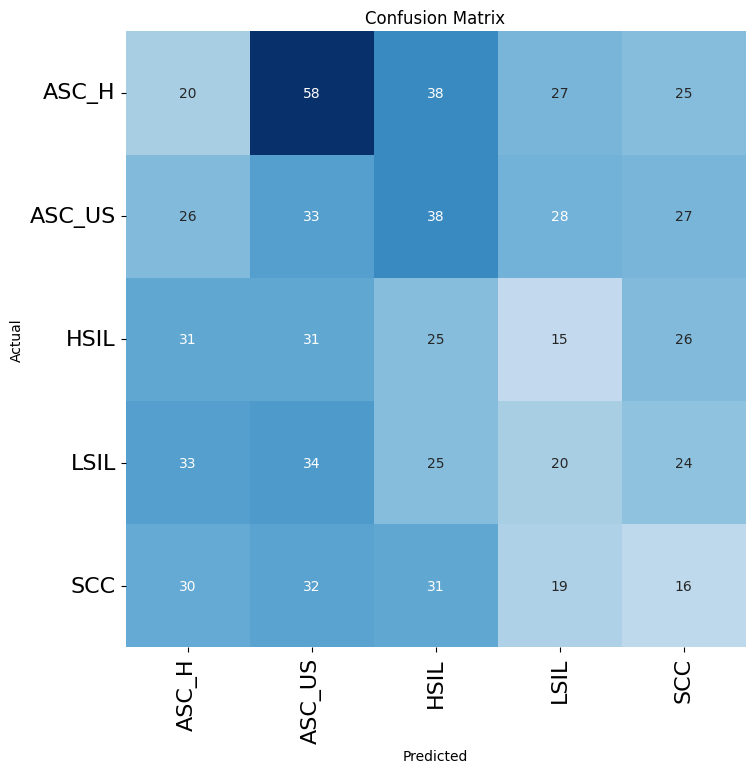

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_set, model)